In [31]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
master = pd.read_pickle("Combined_Social_Data_Pickle.pkl")

In [5]:
master.dtypes

Facebook                                       int64
Instagram                                      int64
Twitter                                        int64
Youtube                                        int64
age                                            int64
artist_name_x                                 object
artist_name_y                                 object
count_of_followers                           float64
created                               datetime64[ns]
created_12am-6am                               int64
created_12pm-6pm                               int64
created_6am-12pm                               int64
created_6pm-12am                               int64
crowdtangle_score                             object
description                                   object
description_length                             int64
facebook                                      object
genre_electronic                             float64
genre_hip_hop                                 

In [11]:
sorted(master.created)[:5]

[Timestamp('2006-04-02 19:09:00'),
 Timestamp('2006-04-03 16:40:00'),
 Timestamp('2006-04-04 16:33:00'),
 Timestamp('2006-04-04 16:56:00'),
 Timestamp('2006-05-02 19:17:00')]

In [12]:
sorted(master.created)[-5:]

[Timestamp('2019-07-06 16:55:14'),
 Timestamp('2019-07-06 16:55:14'),
 Timestamp('2019-07-06 16:55:14'),
 Timestamp('2019-07-06 16:55:14'),
 Timestamp('2019-07-06 16:55:14')]

In [13]:
#Only use data from 1/1/16 to 6/1/19
master = master[(master['created']>pd.to_datetime('01-01-2016')) & (master['created']<pd.to_datetime('06-01-2019'))]

In [14]:
len(master)

681571

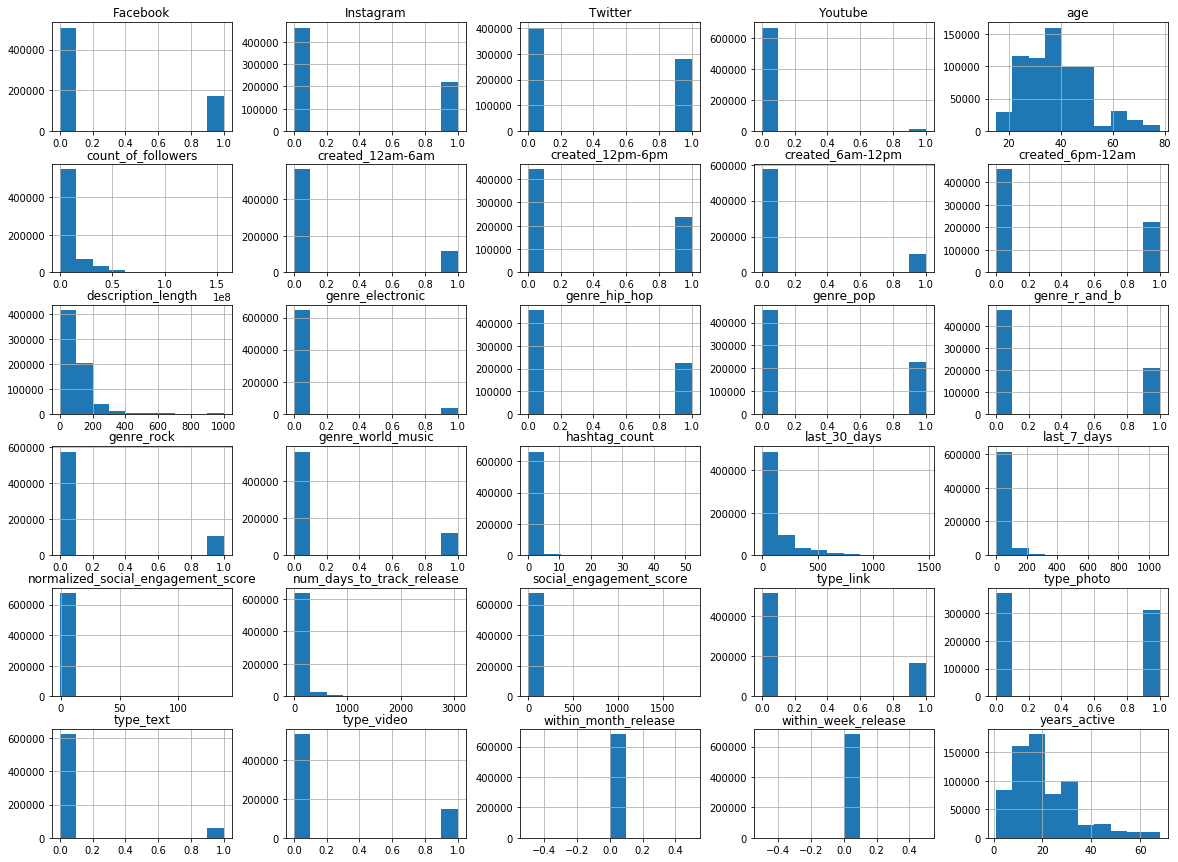

In [16]:
master.hist(figsize = (20,15))
plt.show()

In [24]:
# Check NAs for potential features
master.social_engagement_score.isna().sum()

5646

In [25]:
master.age.isna().sum()

0

In [26]:
master.normalized_social_engagement_score.isna().sum()

5646

In [27]:
master.count_of_followers.isna().sum()

3963

In [28]:
master.years_active.isna().sum()

0

In [30]:
master.description_length.isna().sum()

0

In [34]:
# Normalize data
to_norm_list = ['count_of_followers', 'age', 'description_length', 
                'hashtag_count', 'last_30_days', 'last_7_days', 'num_days_to_track_release','years_active']

In [35]:
for feature in to_norm_list:
    master[feature] = preprocessing.scale(master[feature])

C:\Users\antil\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\antil\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


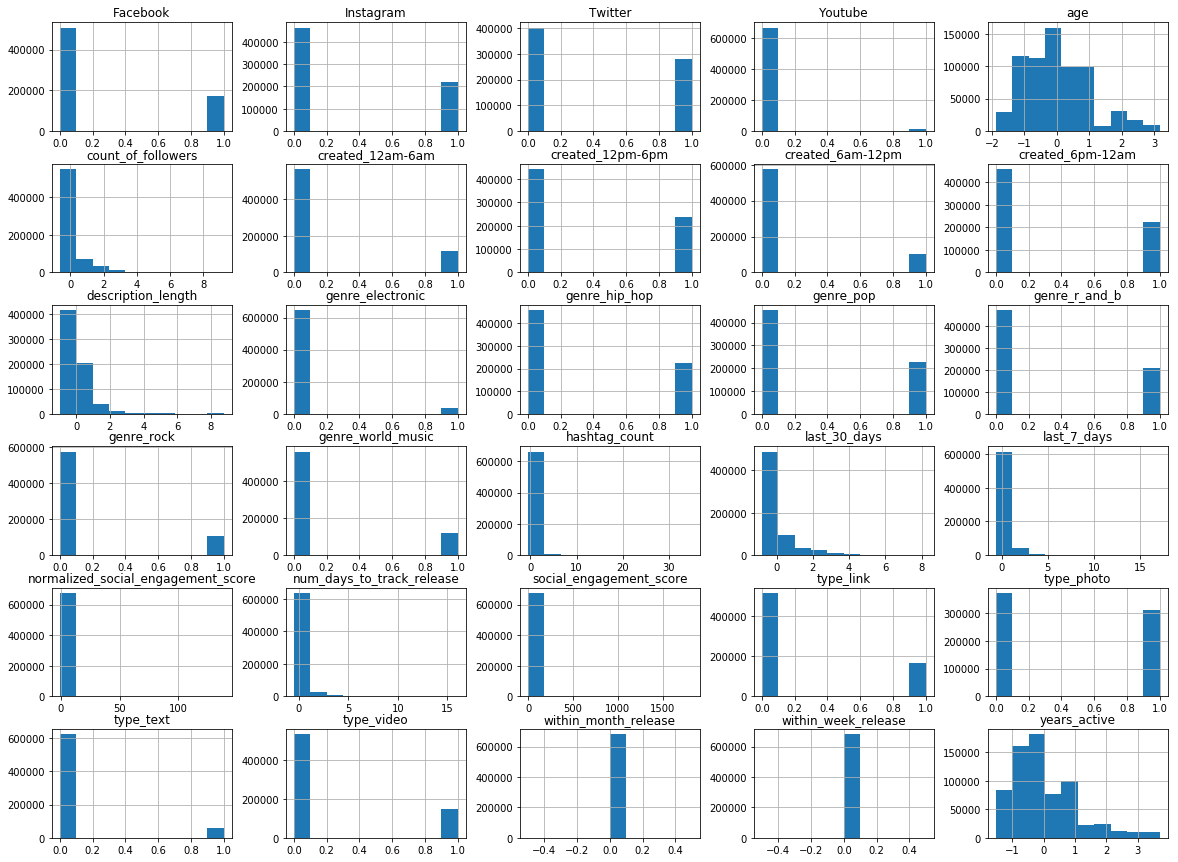

In [36]:
master.hist(figsize = (20,15))
plt.show()